In this assignment will be working with UCI's Urban Land Cover Data Set. This is the classification of urban land cover with 9 different classes that are fairly balanced across train & test. Multi-scale spectral, size, shape, and texture information are used for classification.

You will need to use the SVC & LinearSVC classifiers from sklearn.svm. You will also need to use RandomForestClassifier to compare performance of this model to support vector machine models.

# 1. Data Processing:

a) Import the data: You are provided separate .csv files for train and test.

Train shape: (507, 148)
Test shape: (168, 148)

In [1]:
import pandas as pd

# Load the train and test datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Display the first few rows and the shape of both datasets
train_head = train_data.head()
test_head = test_data.head()
train_shape = train_data.shape
test_shape = test_data.shape

train_shape, test_shape


((507, 148), (168, 148))

b) Remove any rows that have missing data across both sets of data.



c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 

In [2]:
# Check and remove rows with missing data from train and test datasets
train_data_cleaned = train_data.dropna()
test_data_cleaned = test_data.dropna()

# Separating the target variable 'class' from the features
X_train = train_data_cleaned.drop(columns=['class'])
y_train = train_data_cleaned['class']
X_test = test_data_cleaned.drop(columns=['class'])
y_test = test_data_cleaned['class']

# Check shapes after cleaning and separating
shapes_after_cleaning = {
    'X_train_shape': X_train.shape,
    'y_train_shape': y_train.shape,
    'X_test_shape': X_test.shape,
    'y_test_shape': y_test.shape
}

shapes_after_cleaning


{'X_train_shape': (507, 147),
 'y_train_shape': (507,),
 'X_test_shape': (168, 147),
 'y_test_shape': (168,)}

d) Scale all features / predictors (NOT THE TARGET VARIABLE)

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the mean and variance of the first feature column as a quick check
scaled_features_check = {
    'Mean of first feature (train)': X_train_scaled[:, 0].mean(),
    'Variance of first feature (train)': X_train_scaled[:, 0].var(),
    'Mean of first feature (test)': X_test_scaled[:, 0].mean(),
    'Variance of first feature (test)': X_test_scaled[:, 0].var()
}

scaled_features_check


{'Mean of first feature (train)': 3.854028645641569e-16,
 'Variance of first feature (train)': 1.0000000000000002,
 'Mean of first feature (test)': -0.027815745848681808,
 'Variance of first feature (test)': 1.046672756201369}

# 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare SVMs to Random Forest in multiclass problems.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.



In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scale the features (excluding the target variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier with default parameters
rf_classifier=RandomForestClassifier(random_state=0)

# Fit the model on the training data
rf_classifier.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=0)

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [5]:
# Predict on the test data
y_pred_test=rf_classifier.predict(X_test_scaled)

c) Calculate the confusion matrix and classification report for the test data. 

In [6]:
conf_matrix_test= confusion_matrix(y_test, y_pred_test)

class_report_test =classification_report(y_test, y_pred_test)

d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [7]:
y_pred_train=rf_classifier.predict(X_train_scaled)

conf_matrix_train= confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)
# Display test results
print("Confusion Matrix (Test Data):\n", conf_matrix_test)
print("\nClassification Report (Test Data):\n", class_report_test)

# Display training results
print("\nConfusion Matrix (Training Data):\n", conf_matrix_train)
print("\nClassification Report (Training Data):\n", class_report_train)

# Evaluate overfitting
print("\nOverfitting Evaluation:")
if np.mean(y_pred_train == y_train) > np.mean(y_pred_test == y_test):
    print("There are signs of overfitting, as the model performs better on training data than on test data.")
else:
    print("There are no significant signs of overfitting.")


Confusion Matrix (Test Data):
 [[14  0  0  0  0  0  0  0  0]
 [ 1 22  0  2  0  0  0  0  0]
 [ 0  1 13  0  0  0  1  0  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  0 25  0  0  0  4]
 [ 1  0  0  0  0 14  0  0  0]
 [ 3  0  0  0  0  0 13  0  0]
 [ 0  1  0  6  2  0  0  5  0]
 [ 0  0  0  1  1  0  0  0 15]]

Classification Report (Test Data):
               precision    recall  f1-score   support

    asphalt        0.74      1.00      0.85        14
   building        0.76      0.88      0.81        25
        car        1.00      0.87      0.93        15
   concrete        0.65      0.74      0.69        23
      grass        0.89      0.86      0.88        29
       pool        1.00      0.93      0.97        15
     shadow        0.93      0.81      0.87        16
       soil        0.83      0.36      0.50        14
       tree        0.79      0.88      0.83        17

    accuracy                           0.82       168
   macro avg       0.84      0.81      0.81       168
weighted av

e) Identify the top 5 features. Feel free to print a list OR to make a plot. 


Top 5 Features:
Mean_G_40: 0.02367850085024326
Mean_NIR_40: 0.025981227091264544
Mean_NIR: 0.029443069743358717
NDVI_40: 0.033173911361600535
NDVI: 0.03946614076543216


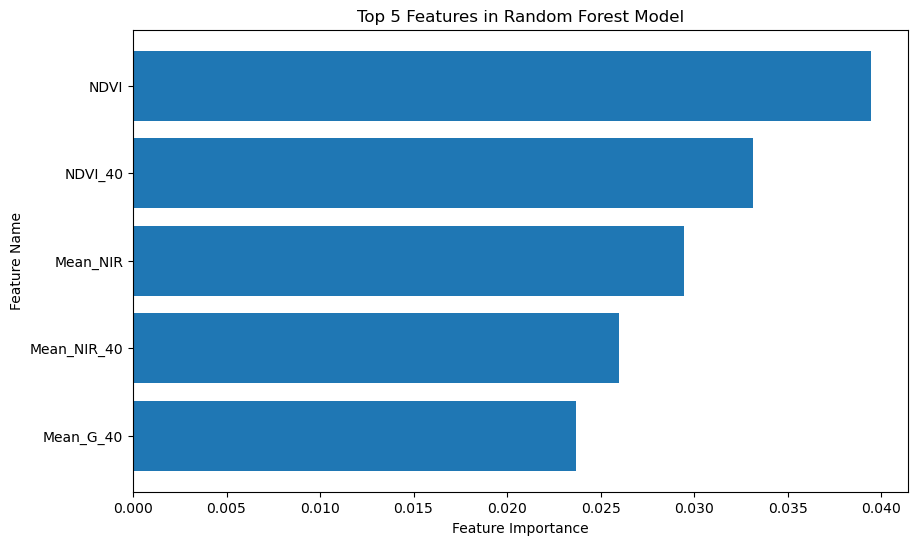

In [8]:
# Identify the top 5 features
feature_importances = rf_classifier.feature_importances_
top_5_indices = np.argsort(feature_importances)[-5:]
top_5_features = [(X_train.columns[i], feature_importances[i]) for i in top_5_indices]
# Print top 5 features
print("\nTop 5 Features:")
for feature, importance in top_5_features:
    print(f"{feature}: {importance}")

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh([X_train.columns[i] for i in top_5_indices], feature_importances[top_5_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 5 Features in Random Forest Model')
plt.show()

# 3. LinearSVM Classifier - Base Model:

Create a simple LinearSVC Classifier only using default parameters.

a) Use the LinearSVC in sklearn. Fit your model on the training data.

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale the features (excluding the target variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LinearSVC with default parameters
linear_svc = LinearSVC(random_state=0)

# Fit the model on the training data
linear_svc.fit(X_train_scaled, y_train)


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [10]:
y_pred_test =linear_svc.predict(X_test_scaled)

c) Calculate the confusion matrix and classification report for test data.

In [11]:

# Calculate the confusion matrix and classification report for the test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Predict on the training data for comparison
y_pred_train = linear_svc.predict(X_train_scaled)

# Calculate the confusion matrix and classification report for the training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Display test results
print("Confusion Matrix (Test Data):\n", conf_matrix_test)
print("\nClassification Report (Test Data):\n", class_report_test)


Confusion Matrix (Test Data):
 [[13  0  0  0  0  0  1  0  0]
 [ 0 22  1  1  1  0  0  0  0]
 [ 0  2 12  0  0  0  0  0  1]
 [ 1  6  0 15  0  0  0  0  1]
 [ 0  0  0  1 26  0  0  0  2]
 [ 1  0  1  0  0 13  0  0  0]
 [ 2  0  0  0  0  0 14  0  0]
 [ 0  4  0  1  3  0  0  6  0]
 [ 0  0  0  1  6  0  0  0 10]]

Classification Report (Test Data):
               precision    recall  f1-score   support

    asphalt        0.76      0.93      0.84        14
   building        0.65      0.88      0.75        25
        car        0.86      0.80      0.83        15
   concrete        0.79      0.65      0.71        23
      grass        0.72      0.90      0.80        29
       pool        1.00      0.87      0.93        15
     shadow        0.93      0.88      0.90        16
       soil        1.00      0.43      0.60        14
       tree        0.71      0.59      0.65        17

    accuracy                           0.78       168
   macro avg       0.83      0.77      0.78       168
weighted av

d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [12]:
# Display training results
print("\nConfusion Matrix (Training Data):\n", conf_matrix_train)
print("\nClassification Report (Training Data):\n", class_report_train)

# Evaluate overfitting
print("\nOverfitting Evaluation:")
if np.mean(y_pred_train == y_train) > np.mean(y_pred_test == y_test):
    print("There are signs of overfitting, as the model performs better on training data than on test data.")
else:
    print("There are no significant signs of overfitting.")


Confusion Matrix (Training Data):
 [[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  1  0  0 80  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]

Classification Report (Training Data):
               precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
we

# 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with linear kernel.

a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing (sorry to our grader for not specifying this last week!).



In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scale the features (excluding the target variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter range for C using np.arange
c_values = np.arange(0.01, 10.2, 0.2)

# Setup the parameter grid
param_grid = {'C': c_values}

svc=SVC(kernel='linear', random_state=0, verbose=0)

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [14]:
# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0, verbose=0),
             param_grid={'C': array([1.000e-02, 2.100e-01, 4.100e-01, 6.100e-01, 8.100e-01, 1.010e+00,
       1.210e+00, 1.410e+00, 1.610e+00, 1.810e+00, 2.010e+00, 2.210e+00,
       2.410e+00, 2.610e+00, 2.810e+00, 3.010e+00, 3.210e+00, 3.410e+00,
       3.610e+00, 3.810e+00, 4.010e+00, 4.210e+00, 4.410e+00, 4.610e+00,
       4.810e+00, 5.010e+00, 5.210e+00, 5.410e+00, 5.610e+00, 5.810e+00,
       6.010e+00, 6.210e+00, 6.410e+00, 6.610e+00, 6.810e+00, 7.010e+00,
       7.210e+00, 7.410e+00, 7.610e+00, 7.810e+00, 8.010e+00, 8.210e+00,
       8.410e+00, 8.610e+00, 8.810e+00, 9.010e+00, 9.210e+00, 9.410e+00,
       9.610e+00, 9.810e+00, 1.001e+01])},
             scoring='accuracy')

c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [15]:
# Extract the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test data using the best estimator
y_pred_test = best_model.predict(X_test_scaled)


d) Calculate the confusion matrix and classification report for test data.

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [16]:
# Calculate the confusion matrix and classification report for the test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Predict on the training data using the best estimator for comparison
y_pred_train = best_model.predict(X_train_scaled)

# Calculate the confusion matrix and classification report for the training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Display the best parameters
print("Best Parameters:", best_params)

# Display test results
print("\nConfusion Matrix (Test Data):\n", conf_matrix_test)
print("\nClassification Report (Test Data):\n", class_report_test)


Best Parameters: {'C': 0.01}

Confusion Matrix (Test Data):
 [[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  1 25  0  0  0  3]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  3  0  5  2  0  0  4  0]
 [ 0  0  0  1  2  0  0  0 14]]

Classification Report (Test Data):
               precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.93      0.97        15
   concrete        0.65      0.74      0.69        23
      grass        0.83      0.86      0.85        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        0.80      0.29      0.42        14
       tree        0.82      0.82      0.82        17

    accuracy                           0.82       168
   macro avg       0.85      0.81  

In [17]:
# Display training results
print("\nConfusion Matrix (Training Data):\n", conf_matrix_train)
print("\nClassification Report (Training Data):\n", class_report_train)

# Evaluate overfitting
print("\nOverfitting Evaluation:")
if np.mean(y_pred_train == y_train) > np.mean(y_pred_test == y_test):
    print("There are signs of overfitting, as the model performs better on training data than on test data.")
else:
    print("There are no significant signs of overfitting.")



Confusion Matrix (Training Data):
 [[40  0  0  0  0  0  5  0  0]
 [ 2 87  0  7  0  0  1  0  0]
 [ 0  1 19  1  0  0  0  0  0]
 [ 0  9  0 83  1  0  0  0  0]
 [ 0  1  0  0 70  0  0  0 12]
 [ 0  1  0  0  1 12  0  0  0]
 [ 1  0  0  0  0  0 43  0  1]
 [ 0  3  0  4  2  0  0 11  0]
 [ 0  0  0  0  3  0  1  0 85]]

Classification Report (Training Data):
               precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
we

# 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.

a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
degree: 2, 3, 4, 5, 6

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.



In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Define the parameter range for C and degree
c_values = np.arange(0.01, 10.2, 0.2)
degrees = [2, 3, 4, 5, 6]

# Setup the parameter grid
param_grid = {
    'C': c_values,
    'degree': degrees
}

# Initialize the SVC with a polynomial kernel
svc_poly = SVC(kernel='poly', random_state=0)

# Setup the GridSearchCV
grid_search_poly = GridSearchCV(estimator=svc_poly, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the scaled training data
grid_search_poly.fit(X_train_scaled, y_train)

# Extract the best parameters and the best estimator
best_params_poly = grid_search_poly.best_params_
best_model_poly = grid_search_poly.best_estimator_

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [19]:
# Predict on the test data using the best estimator
y_pred_test_poly = best_model_poly.predict(X_test_scaled)

# Calculate the confusion matrix and classification report for the test data
conf_matrix_test_poly = confusion_matrix(y_test, y_pred_test_poly)
class_report_test_poly = classification_report(y_test, y_pred_test_poly)

# Predict on the training data using the best estimator for comparison
y_pred_train_poly = best_model_poly.predict(X_train_scaled)

# Calculate the confusion matrix and classification report for the training data
conf_matrix_train_poly = confusion_matrix(y_train, y_pred_train_poly)
class_report_train_poly = classification_report(y_train, y_pred_train_poly)

# Display the best parameters
print("Best Parameters:", best_params_poly)

Best Parameters: {'C': 3.81, 'degree': 3}


c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

In [20]:
# Display test results
print("\nConfusion Matrix (Test Data):\n", conf_matrix_test_poly)
print("\nClassification Report (Test Data):\n", class_report_test_poly)


Confusion Matrix (Test Data):
 [[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  2 11  0  0  1  0  1  0]
 [ 0  5  0 17  1  0  0  0  0]
 [ 0  0  0  0 26  0  0  1  2]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 14  0  1]
 [ 0  2  0  5  7  0  0  0  0]
 [ 0  0  0  1  3  0  0  0 13]]

Classification Report (Test Data):
               precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.73      0.85        15
   concrete        0.68      0.74      0.71        23
      grass        0.68      0.90      0.78        29
       pool        0.93      0.93      0.93        15
     shadow        0.88      0.88      0.88        16
       soil        0.00      0.00      0.00        14
       tree        0.81      0.76      0.79        17

    accuracy                           0.77       168
   macro avg       0.74      0.75      0.74       168
weighted a

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [21]:


# Display training results
print("\nConfusion Matrix (Training Data):\n", conf_matrix_train_poly)
print("\nClassification Report (Training Data):\n", class_report_train_poly)
# Evaluate overfitting
print("\nOverfitting Evaluation:")
if np.mean(y_pred_train_poly == y_train) > np.mean(y_pred_test_poly == y_test):
    print("There are signs of overfitting, as the model performs better on training data than on test data.")
else:
    print("There are no significant signs of overfitting.")


Confusion Matrix (Training Data):
 [[44  0  0  0  1  0  0  0  0]
 [ 0 95  0  1  1  0  0  0  0]
 [ 0  0 20  0  1  0  0  0  0]
 [ 0  1  0 91  1  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  1 13  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0 11  0  0  9  0]
 [ 0  0  0  0  5  0  0  0 84]]

Classification Report (Training Data):
               precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.79      0.98      0.88        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.45      0.62        20
       tree        0.99      0.94      0.97        89

    accuracy                           0.95       507
   macro avg       0.97      0.91      0.93       507
we

# 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.

a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
gamma: 0.01,  0.1, 1, 10, 100

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Parameter grid definition
C_range = np.arange(0.01, 10.2, 0.2)  # C: 0.01 to 10 in increments of 0.2
gamma_range = [0.01, 0.1, 1, 10, 100]  # Gamma values

param_grid = {
    'C': C_range,
    'gamma': gamma_range,
    'kernel': ['rbf']
}

# Setup the GridSearchCV with SVC
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000e-02, 2.100e-01, 4.100e-01, 6.100e-01, 8.100e-01, 1.010e+00,
       1.210e+00, 1.410e+00, 1.610e+00, 1.810e+00, 2.010e+00, 2.210e+00,
       2.410e+00, 2.610e+00, 2.810e+00, 3.010e+00, 3.210e+00, 3.410e+00,
       3.610e+00, 3.810e+00, 4.010e+00, 4.210e+00, 4.410e+00, 4.610e+00,
       4.810e+00, 5.010e+00, 5.210e+00, 5.410e+00, 5.610e+00, 5.810e+00,
       6.010e+00, 6.210e+00, 6.410e+00, 6.610e+00, 6.810e+00, 7.010e+00,
       7.210e+00, 7.410e+00, 7.610e+00, 7.810e+00, 8.010e+00, 8.210e+00,
       8.410e+00, 8.610e+00, 8.810e+00, 9.010e+00, 9.210e+00, 9.410e+00,
       9.610e+00, 9.810e+00, 1.001e+01]),
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']})

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [23]:
# Output best parameters and best model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}


c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

In [26]:
# Predictions on test data
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Get classification reports in dictionary format
class_report_test = classification_report(y_test, y_pred_test, output_dict=True)
class_report_train = classification_report(y_train, y_pred_train, output_dict=True)

# Print Confusion Matrices and Classification Reports
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))


Confusion Matrix (Test Data):
 [[ 0 14  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0]]
Classification Report (Test Data):
               precision    recall  f1-score   support

    asphalt        0.00      0.00      0.00        14
   building        0.15      1.00      0.26        25
        car        0.00      0.00      0.00        15
   concrete        0.00      0.00      0.00        23
      grass        0.00      0.00      0.00        29
       pool        0.00      0.00      0.00        15
     shadow        0.00      0.00      0.00        16
       soil        0.00      0.00      0.00        14
       tree        0.00      0.00      0.00        17

    accuracy                           0.15       168
   macro avg       0.02      0.11      0.03       168
weighted avg

/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [27]:
print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report (Training Data):\n", classification_report(y_train, y_pred_train))

# Evaluating overfitting by comparing f1-scores
train_f1 = class_report_train['weighted avg']['f1-score']
test_f1 = class_report_test['weighted avg']['f1-score']
if train_f1 > test_f1:
    print("Model may be overfitting.")
else:
    print("Model is generalizing well.")


Confusion Matrix (Training Data):
 [[ 0 45  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0]
 [ 0 93  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0]]
Classification Report (Training Data):
               precision    recall  f1-score   support

    asphalt        0.00      0.00      0.00        45
   building        0.19      1.00      0.32        97
        car        0.00      0.00      0.00        21
   concrete        0.00      0.00      0.00        93
      grass        0.00      0.00      0.00        83
       pool        0.00      0.00      0.00        14
     shadow        0.00      0.00      0.00        45
       soil        0.00      0.00      0.00        20
       tree        0.00      0.00      0.00        89

    accuracy                           0.19       507
   macro avg       0.02      0.11      0.04       507
weig

/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

# 7. Conceptual Questions:

### a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

Support Vector Machine Classifier + Linear Kernel + Grid Search perfroms the best in that had the highest F1-scores across classes. F1-score balances the trade-off between precision and recall, making it a robust measure, especially in the presence of class imbalance

### b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 


Both polynomial and RBF kernels are capable of handling non-linear data relationships, which a linear kernel cannot. RBF Kernel is powerful as it can handle complex datasets with high dimensionality and is effective in classifying non-linearly separable data.
Polynomial Kernel can add more flexibility with degrees, enabling the model to distinguish datasets based on the degree of the polynomial.

However, polynomial or rbf kernel had overfiting issue as shown above and this tells that careful parameter tuning us needed.

### c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 

the  'C' parameter in SVM is a regulariazation parameter that determines the trade-off between a low training data error and minimizing the model compexity.
Choosing the right 'C' is important for balancing bias and variance. Small C implies a lot of regularization, which encourages the model to be simpler (potentially underfitting). Large C implies less regularization, focusing more on correctly classifying all training examples even if it means a more complex boundary (potentially overfitting).


### d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

**SVMs are sensitive to the feature scales** because they **aim to maximize the margin between classes.** 

for example features like "Area" (potentially varying from a few square meters to thousands) and "Weight" (pound/kg) could have vastly different scales. Without scaling, "Area" might dominate the decision function.

### e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.

 The kernel in an SVM model is a function that **transforms original feature space into a higher-dimensional space where a hyperplane can linearly separate the data if it wasn't linearly separable in the original space.**
 
Kernels effectively allow SVMs to perform complex transformations and separations without explicitly creating the high-dimensional representations, which is known as the "kernel trick."
Common kernels include linear, polynomial, and RBF. The choice of kernel depends on the dataset and the specific non-linear relationships present in the data.
